In [1]:
# Loading and Preparing the Data for Analysis
%matplotlib inline 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.graphics.api as smg 
import pandas as pd 
import numpy as np 
import patsy 
from statsmodels.graphics.correlation import plot_corr 
from sklearn.model_selection import train_test_split 
plt.style.use('seaborn') 

In [2]:
from scipy import stats
sns.set(style="ticks", color_codes=True)

In [3]:
#!head -2 train.csv

In [4]:
# Loading raw data
amesHousingRawData = pd.read_csv('train.csv')
amesHousingRawData.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [13]:
amesHousingRawData.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# The Target variable
# Let’s check its distribution.

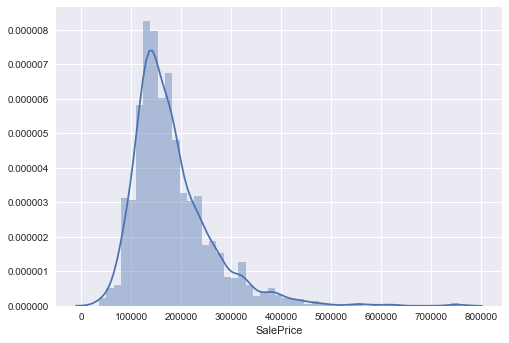

In [25]:
# Checking the distribution of the dependent variable
sns.distplot(amesHousingRawData.SalePrice)
plt.show()

In [ ]:
# This shows the distribution isn't normal

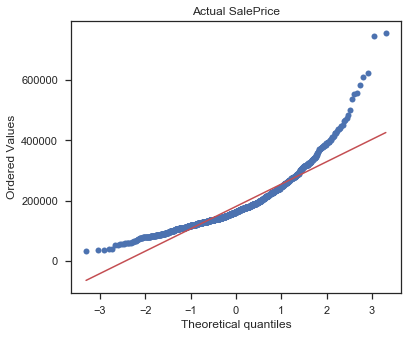

In [14]:
figure = plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
stats.probplot(amesHousingRawData.SalePrice, plot = plt)
plt.title('Actual SalePrice')
plt.show()

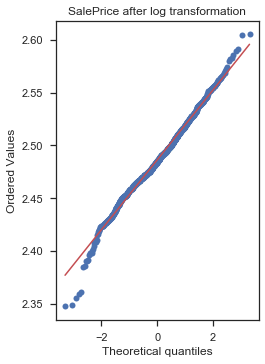

In [16]:
# This show the SalePrice is not linear
# To make it linear, we use the log transformation
plt.subplot(1,2,2)
amesHousingRawData.SalePrice = np.log(amesHousingRawData.SalePrice)
stats.probplot(amesHousingRawData.SalePrice, plot = plt)
plt.title('SalePrice after log transformation')
plt.show()

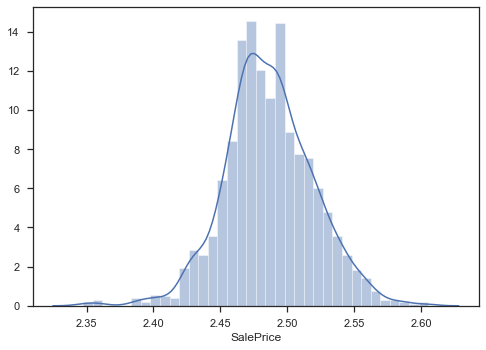

In [17]:
# After performing the log function
sns.distplot(amesHousingRawData.SalePrice)
plt.show()

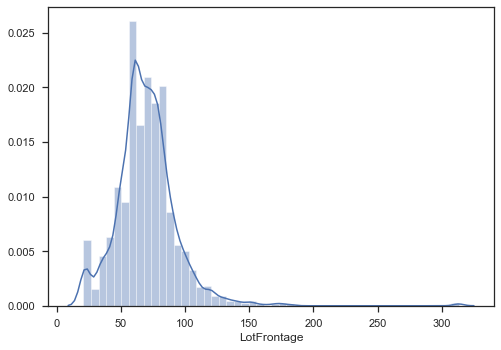

In [20]:
# Checking the distribution of the independent variables
sns.distplot(amesHousingRawData.LotFrontage)
plt.show()

In [5]:
# checking for missing data
# listing column values that are missing 
#list(amesHousingRawData.isnull().sum())

In [26]:
checkMissingData = amesHousingRawData.isna().sum() #Summing missing values
#list(missing)
missingData = checkMissingData[checkMissingData > 0] # missing values greater than 0
missingDataPercentage = missingData/amesHousingRawData.shape[0]*100 # Percentage of missing values
nonAvailable = pd.DataFrame([missingData, missingDataPercentage], index= ['number_missingValue', 'percentage_missingValue']).T 
nonAvailable = nonAvailable.sort_values(by = 'percentage_missingValue', ascending = False)

In [27]:
checkMissingData

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [28]:
missingData

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [30]:
missingDataPercentage

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [31]:
nonAvailable

,number_missingValue,percentage_missingValue
PoolQC,1453.0,99.520548
MiscFeature,1406.0,96.301370
Alley,1369.0,93.767123
Fence,1179.0,80.753425
FireplaceQu,690.0,47.260274
LotFrontage,259.0,17.739726
GarageType,81.0,5.547945
GarageYrBlt,81.0,5.547945
GarageFinish,81.0,5.547945
GarageQual,81.0,5.547945


In [7]:
# Summary statistics
amesHousingRawData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [62]:
# checking for missing data
# listing column values that are missing 
#list(amesHousingNumRawData.isnull().sum())

In [19]:
# Divide the DataFrame into training and test sets, as shown in the following code snippet:
X = amesHousingNumRawData.drop('SalePrice', axis = 1)
y = amesHousingNumRawData[['SalePrice']]
seed = 20
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

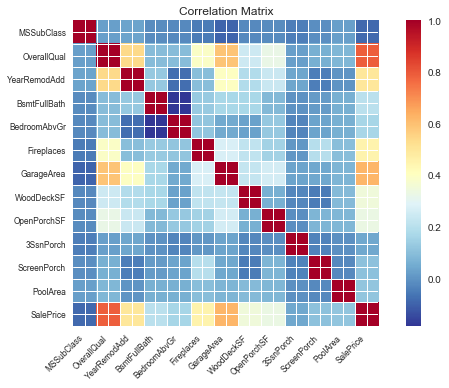

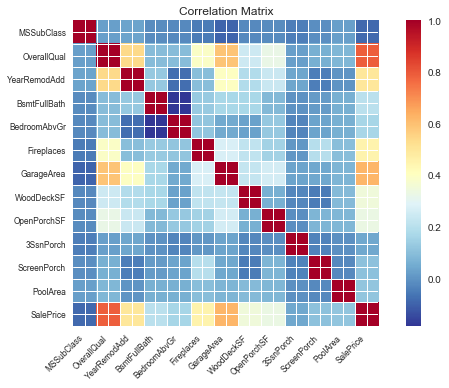

In [17]:
corrMatrix = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

In [14]:
# Pandas provides a corr function, which when called on DataFrame provides a matrix (table) of the correlation 
#of all numeric data types.
corrMatrix

,MSSubClass,OverallQual,YearRemodAdd,BsmtFullBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,SalePrice
MSSubClass,1.000000,0.010803,0.035918,0.007701,-0.009834,-0.055114,-0.094941,0.008293,-0.031800,-0.044877,-0.039528,0.009446,-0.094752
OverallQual,0.010803,1.000000,0.553374,0.099089,0.123848,0.396208,0.547486,0.237008,0.323565,0.028541,0.070227,0.120516,0.785929
YearRemodAdd,0.035918,0.553374,1.000000,0.123236,-0.046724,0.138697,0.362687,0.219591,0.228279,0.052175,-0.058361,0.026191,0.520180
BsmtFullBath,0.007701,0.099089,0.123236,1.000000,-0.143136,0.138546,0.188108,0.164347,0.083993,0.017339,0.025954,0.099263,0.226673
BedroomAbvGr,-0.009834,0.123848,-0.046724,-0.143136,1.000000,0.128066,0.096885,0.036240,0.109901,-0.053575,0.061561,0.088313,0.183327
Fireplaces,-0.055114,0.396208,0.138697,0.138546,0.128066,1.000000,0.272145,0.197190,0.170779,0.028029,0.202170,0.132823,0.461257
GarageArea,-0.094941,0.547486,0.362687,0.188108,0.096885,0.272145,1.000000,0.234329,0.272061,0.048217,0.053734,0.123100,0.613166
WoodDeckSF,0.008293,0.237008,0.219591,0.164347,0.036240,0.197190,0.234329,1.000000,0.036538,-0.062319,-0.078110,0.000260,0.302292
OpenPorchSF,-0.031800,0.323565,0.228279,0.083993,0.109901,0.170779,0.272061,0.036538,1.000000,-0.016400,0.112597,0.067705,0.335773
3SsnPorch,-0.044877,0.028541,0.052175,0.017339,-0.053575,0.028029,0.048217,-0.062319,-0.016400,1.000000,-0.034357,-0.007726,0.049694


In [23]:
amesHousingRawData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale

In [70]:
list(amesHousingNumRawData)

['MSSubClass',
 'LotArea',
 'OverallQual',
 'YearRemodAdd',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [10]:
# When you start working with a new dataset, I suggest you 
#explore the variables you are planning to use one at a time, 
#and a good way to start is by looking at histograms.

In [18]:
# The need to clean this dataset
# The need to remove null values or fill them with values
# The need to study about housing price in the US
# The need to add or remove columns based on study results